# Introduction à l'apprentissage automatique: TP1 - Exercice 2 

<br>

L'objectif de cet exercice est de construire un modèle de régression linéaire.

__Remarque__: il ne s'agit que d'une étude préliminaire; il faudrait également tester les modèles non-linéaires que l'on verra dans la suite du cours.

<br>

On cherche à prédire l'influence de dix indicateurs $x_1,x_2,\dots,x_{10}$ (âge, sexe, et diverses mesures physiologiques) sur un indicateur $y$ de la progression du diabète, à l'aide d'un modèle linéaire. Une étude complète nécessiterait de justifier ce modèle par des graphiques, les coefficients de corrélation linéaire, etc., comme vous l'avez fait en cours d'Analyse de données. Nous ne le ferons pas faute de temps.

On se base sur un jeu de données intégré à scikit-learn et [décrit ici](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).

Notez la remarque:
> Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1).

Il est donc inutile de normaliser les caractéristiques.


In [1]:
# import des bibliothèques Python utiles:
import numpy as np
from sklearn import datasets, linear_model, metrics, model_selection

import matplotlib.pyplot as plt

# "magic function" Jupyter pour l'affichage des graphiques dans le carnet:
%matplotlib inline

In [2]:
# chargement des données
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# affichage des 5 premières observations 
print(diabetes_X[:5,:])  # rappel: les observations ont été préalablement normalisées
print(diabetes_y[:5])  # les labels y ne sont pas normalisés

# nombre d'observations:
print("\nnombre d'observations dans la base de données: %d" %len(diabetes_X))

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]
[151.  75. 141. 206. 135.]

nombre d'observations dans la base de données: 442


Les observations (chacune est composée de 10 indicateurs) forment les colonnes de `diabetes_X` et l'indicateur à prédire est stocké dans `diabetes_y`.

On commence par séparer la base de données entre un ensemble d'apprentissage et un ensemble de test qui nous servira à évaluer les modèles de régression (20% des observations pour ce dernier ensemble). La répartition est faite de manière aléatoire par la cellule suivante. 

__Remarque__: dans la cellule suivante, `random_state=42` (nombre arbitraire) permet de fixer la graine du générateur aléatoire de manière à ce que nous ayons tous la même répartition aléatoire, ce qui facilitera la discussion.

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(diabetes_X, diabetes_y, \
    test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


__Question 1__. Que font les trois cellules suivantes? Commentez en particulier les graphiques. Pourquoi la MSE est-elle calculée sur la base test?

In [4]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

MSE_lr = np.mean((lr.predict(X_test) - y_test) ** 2)

print(MSE_lr)

2900.1936284934804


<font color=red>

Les trois cellues ont fait le calucle de regression linear pour le base de donnes de test, c-a-d, just 20% de tout le data collecté !

Nous allons decrouvir le MSE qui il y dans une regression linear très simples !   
</font>

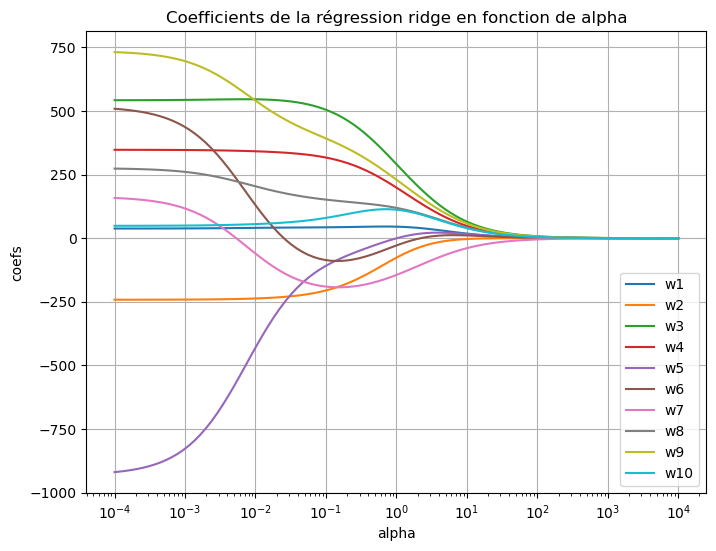

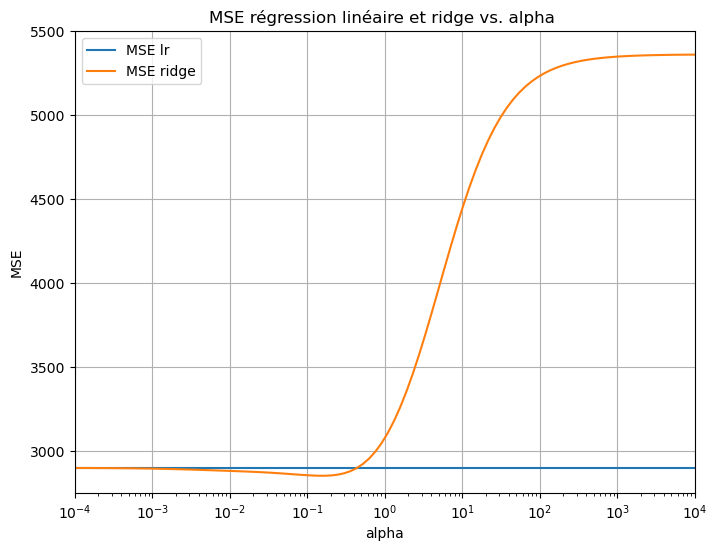

In [8]:
n_alphas = 100
alphas = np.logspace(-4, 4, n_alphas)
coefs=np.zeros((0,10))
MSE_ridge=[]
for a in alphas:
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs=np.vstack((coefs,ridge.coef_))
    MSE_ridge.append([MSE_lr, np.mean((ridge.predict(X_test) - y_test) ** 2)])

plt.figure(figsize=(8,6))
plt.semilogx(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('coefs')
plt.title('Coefficients de la régression ridge en fonction de alpha')
plt.axis('tight')
plt.legend(['w1','w2','w3','w4','w5','w6','w7','w8','w9','w10'])
plt.grid()
plt.show()

plt.figure(figsize=(8,6))
plt.semilogx(alphas, MSE_ridge)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('MSE régression linéaire et ridge vs. alpha ')
plt.axis([1e-4,1e4,2750,5500])
plt.legend(['MSE lr','MSE ridge'])
plt.grid()
plt.show()

<font color=red>
    
Le graphique represent qui avec le plus grand valuer de alpha, le valuer tend a une moyenne.
    
</font>

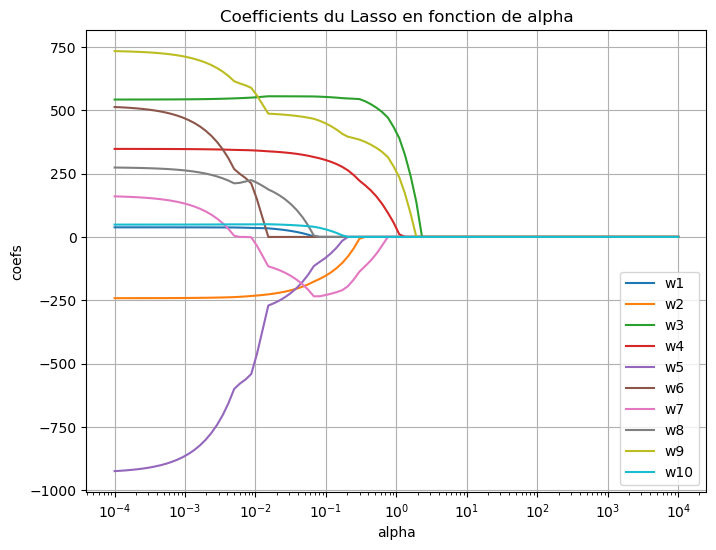

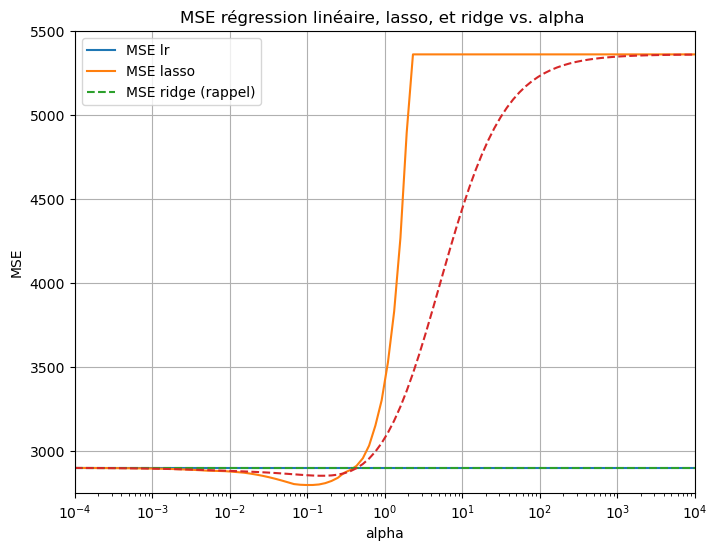

In [6]:
n_alphas = 100
alphas = np.logspace(-4, 4, n_alphas)
coefs=np.zeros((0,10))
MSE_lasso=[]
for a in alphas:
    lasso = linear_model.Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    coefs=np.vstack((coefs,lasso.coef_))
    MSE_lasso.append([MSE_lr, np.mean((lasso.predict(X_test) - y_test) ** 2)])

#print(coefs)
    
plt.figure(figsize=(8,6))
plt.semilogx(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('coefs')
plt.title('Coefficients du Lasso en fonction de alpha')
plt.legend(['w1','w2','w3','w4','w5','w6','w7','w8','w9','w10'])
plt.axis('tight')
plt.grid()
plt.show()

plt.figure(figsize=(8,6))
plt.semilogx(alphas, MSE_lasso)
plt.semilogx(alphas, MSE_ridge, '--')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.axis([1e-4,1e4,2750,5500])
plt.title('MSE régression linéaire, lasso, et ridge vs. alpha ')
plt.legend(['MSE lr','MSE lasso','MSE ridge (rappel)'])
plt.grid()
plt.show()

<font color=red>
    
Votre réponse.
    
</font>

__Question 2__. Proposez des modèles de régression multivariée pour prédire $y$ en fonction des 10 indicateurs dans $X$. Vous testerez régression linéaire, ridge, lasso et fixerez l'hyperparamètre de ces deux dernières méthodes par validation croisée sur la _base d'apprentissage_ , conformément à la démarche vue dans l'exercice 1 (utilisez `RidgeCV` et `LassoCV`).

<br>

Quel est finalement le meilleur modèle?  Quelles sont les variables sélectionnées et leur influence quantitative?

_Indication_ : calculez la valeur de MSE sur la _base de test_ et comparez à la variance des étiquettes à prédire.

<br>

Quelles variables semblent les plus pertinentes dans l'étude?


In [7]:
# votre code ici:



<font color=red>

Votre réponse.
    
</font>